# Question 1:
### Make a 9x9 numpy array filled with the repeating pattern 1,2,3,1,2,3,...

In [5]:
import numpy

arr = numpy.zeros((9,9))
tup = (1,2,3,1,2,3,1,2,3)
for i in range(0,9) :
    arr[i] = tup
print(arr)

[[1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]
 [1. 2. 3. 1. 2. 3. 1. 2. 3.]]


# Question 2:
### Write a function that performs min-max scaling on a numpy array across rows 

## Example:

### Input 
$\begin{bmatrix}1& 2& 3\\10 & 15 & 20 \\ -5 & -11&  9\end{bmatrix}$
    
### Output
$\begin{bmatrix} 0 & 0.5 & 1 \\ 0 & 0.5 & 1 \\ 0.3 & 0 & 1 \end{bmatrix}$


In [75]:
# Answer 2 - using for loops
import numpy

def scalingWithFor() :
    arr = numpy.array([[1,2,3] , [10,15,20] , [-5,-11,9]]).astype(float)
    for i in range(0,3) :
        min = arr[i].min(axis=0)
        max = arr[i].max(axis=0)
        for j in range(0,3) :
            arr[i][j] = (arr[i][j] - min) / (max - min)
    print(arr)
    
scalingWithFor()

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.3 0.  1. ]]


In [76]:
# Answer 2 - without using for loops
def scalingWithoutFor() :
    arr = numpy.array([[1,2,3] , [10,15,20] , [-5,-11,9]]).astype(float)
    min = arr.min(axis=1).reshape(3,1)
    minarr = numpy.tile(min , 3)
    max = arr.max(axis=1).reshape(3,1)
    maxarr = numpy.tile(max , 3)
    arr = (arr - minarr)/(maxarr - minarr)
    print(arr)

scalingWithoutFor()

[[0.  0.5 1. ]
 [0.  0.5 1. ]
 [0.3 0.  1. ]]


# Question 3:
### Find index of the element of the array which is closest to a given value

## Example:

### Input 
$\begin{bmatrix}4.5& -5& 83\\5.11 & 5.25 & 20 \\ -5 & 42&  69.99\end{bmatrix}$
    
val = 5

### Output

index = (1, 0)


In [40]:
# Answer 3 - using for loops
import numpy

def closest(arr , value) :
    narr = numpy.array(x , dtype = numpy.float64)
    index = [0, 0]
    min = abs(narr[0][0] - value)
    for i in range(0,narr.shape[0]) :
        for j in range(0,narr.shape[1]) :
             if(abs(narr[i][j] - value) < min) :
                    min = abs(narr[i][j] - value)
                    index = [i , j]
    print(index)
    
x = [[4.5, -5, 83], [5.11, 5.25, 20], [-5, 42, 69.99]]
val = 5
closest(x , val)

[1, 0]


In [47]:
# Answer 3 - without using for loops
import numpy

def closestWithoutLoop(arr , value) :
    narr = numpy.array(x , dtype = numpy.float64)
    minarr = abs(narr - value)
    flattened_index = numpy.argmin(minarr)
    index = (int(flattened_index / narr.shape[1]) , int(flattened_index % narr.shape[1])) 
    print(index)
    
x = [[4.5, -5, 83], [5.11, 5.25, 20], [-5, 42, 69.99]]
val = 5
closestWithoutLoop(x , val)

(1, 0)


# Question 4:
### Implement A sliding window average of a given array

Example: https://www.youtube.com/watch?v=ZoaEDbivmOE

In [55]:
# Answer 4 - using for loops
import numpy

def windowavg(arr , a , b) :
    sum = 0
    for i in range(a-1 , a+2) :
        for j in range(b-1 , b+2) :
           sum += arr[i][j]
    return float(sum/9)
    
#Assumption is that the input array is a square matrix and size of window is taken to be fixed, equal to 3
def slidingAverage(arr) :
    narr = numpy.array(arr)
    copyarr = narr.copy()
    length = narr.shape[0]
    for i in range(1,length-2) :
        for j in range(1,length-2) :
            narr[i][j] = windowavg(copyarr , i,j)
    print(narr)
    
x = [[0,0, 0,0 ,0, 0, 0, 0,0],
     [0,0, 0,0, 0, 0, 0, 0,0],
     [0,0, 0,90,90,90,90,0,0],
     [0,0, 0,90,0, 90,90,0,0],
     [0,0, 0,90,90,90,90,0,0],
     [0,0, 0,90,90,90,90,0,0],
     [0,0, 0,90,90,90,90,0,0],
     [0,90,0,0 ,0, 0, 0, 0,0],
     [0,0, 0,0 ,0, 0, 0, 0,0],
     [0,0, 0,0 ,0, 0, 0, 0,0],]
slidingAverage(x)

[[ 0  0  0  0  0  0  0  0  0]
 [ 0  0 10 20 30 30 20 10  0]
 [ 0  0 20 30 50 50 40 20  0]
 [ 0  0 30 50 80 80 60 30  0]
 [ 0  0 30 50 80 80 60 30  0]
 [ 0  0 30 60 90 90 60 30  0]
 [ 0 10 30 40 60 60 40 20  0]
 [ 0 10 20 20 30 30 20 10  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]]


# (Optional) Question 5
### Implement John Conway's Game of Life

You can read about the rules of the game and play it at: https://bitstorm.org/gameoflife/

In [88]:
import numpy

def countNeibhours(b , i , j) :
    count = numpy.sum(a[i-1 : i + 2 , j - 1 : j + 2])
    return count

a = numpy.random.randint(2 , size = (10 , 10))
for x in range(0 , 10) :
    b = a.copy()
    for i in range(1 , 8) :
        for j in range(1 , 8) :
            count = countNeibhours(b , i , j)
            if a[i][j]:
                if count < 2 or count >3 :
                    a[i][j] = 0
            elif count ==3 :
                a[i][j] = 1
    print(a)

[[1 1 1 0 1 1 0 1 0 1]
 [0 0 0 1 0 0 0 0 1 0]
 [1 0 1 1 0 1 1 1 0 1]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 1 1 0 1 0 1 0 1]
 [1 0 0 0 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 1 1 1 0 0 0]
 [1 1 0 0 1 0 0 0 0 1]]
[[1 1 1 0 1 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 1 1 1 0 1 1 0 1]
 [0 1 1 0 1 0 0 1 0 0]
 [1 0 0 0 1 1 0 1 1 1]
 [1 0 1 0 0 0 0 1 0 1]
 [1 1 0 0 1 1 1 1 0 1]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 0 0 0]
 [1 1 0 0 1 0 0 0 0 1]]
[[1 1 1 0 1 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 1 1 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [1 1 1 0 1 1 1 0 1 1]
 [1 0 0 1 0 0 0 0 0 1]
 [1 0 0 1 0 1 1 1 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 1 1 1 0 0 0]
 [1 1 0 0 1 0 0 0 0 1]]
[[1 1 1 0 1 1 0 1 0 1]
 [0 0 0 1 0 0 0 1 1 0]
 [1 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 1 0 0 0]
 [1 0 1 0 0 0 1 1 1 1]
 [1 0 1 0 0 1 0 0 0 1]
 [1 1 1 1 1 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 1 1 1 1 1 0 0 0]
 [1 1 0 0 1 0 0 0 0 1]]
[[1 1 1 0 1 1 0 1 0 1]
 [0 0 0 0 1 1 0 0 1 0]
 [1 0 0 1 0 0 1 0 0 1]
 [0 1 1

# Final Task 
## Implement edge detection using a Sobel Filter
Read more about Sobel filter : [Wikipedia article](https://en.wikipedia.org/wiki/Sobel_operator "Sobel Operator")
Some sample code to display the results is already given



(148, 198)


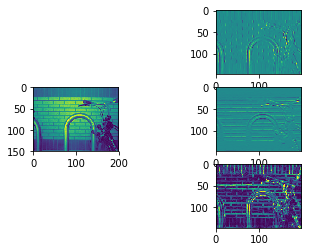

In [78]:
%matplotlib inline
# Note: DO NOT USE THE SCIPY INBUILT FUNCTION. CONVOLVE USING FILTERS AND NORMALIZE
import scipy
import imageio
import matplotlib.pyplot as plt
import numpy as np

im = imageio.imread('./fig01.jpg').astype("int32")
grey_img = None #convert image to greyscale 

grey_shape = list(im.shape)
grey_shape[-1] = 1
grey_shape = tuple(grey_shape)

# assert grey_img.shape == grey_shape
ax1 = plt.subplot(323)
ax2 = plt.subplot(322)
ax3 = plt.subplot(324)
ax4 = plt.subplot(326)

## Initializing the sobel filter
filterx = np.array(   [[ 3, 0 , -3 ],
                      [ 10, 0 , -10],
                      [ 3 , 0 , -3 ]])
filtery = filterx.T

## Fill the code below

def convulateOperator(ker , img , a , b) :
    # Extracting a 3x3 matrix from the entire image based on the central value
    new_img = np.zeros((3,3))
    for i in range(a - 1 , a + 2) :
        for j in range(b - 1 , b + 2) :
            new_img[i - a][j - b] = img[i][j]
    value = 0
    for i in range(0 , 3) :
        for j in range(0 , 3) :
            value += new_img[i][j] * ker[2-i][2-j]
    return value

dx = np.zeros((im.shape[0] - 2 , im.shape[1] - 2))
dy = np.zeros((im.shape[0] - 2 , im.shape[1] - 2))
for i in range(1 , im.shape[0] - 1) :
    for j in range(1 , im.shape[1] - 1) :
        dx[i - 1][j - 1] = convulateOperator(filterx , im , i , j)
        dy[i - 1][j - 1] = convulateOperator(filtery , im , i , j)
        
def scalingWithoutFor(x) :
    arr = numpy.array(x).astype(float)
    min = arr.min(axis=1).reshape(-1,1)
    minarr = numpy.tile(min , arr.shape[1])
    max = arr.max(axis=1).reshape(-1,1)
    maxarr = numpy.tile(max , arr.shape[1])
    arr = (arr - minarr)/(maxarr - minarr)
    return arr

mag =  np.sqrt(dx ** 2 + dy ** 2)
print(mag.shape)
normalized = scalingWithoutFor(mag) 

## End
## Plot it
ax1.imshow(im)
ax2.imshow(dx)
ax3.imshow(dy)
ax4.imshow(normalized)
plt.show()

# All Done?
## Checkout these advanced guides

### [Advanced Numpy](https://scipy-lectures.org/advanced/advanced_numpy/index.html)
### [Image Processing](https://scipy-lectures.org/advanced/image_processing/index.html)